### Step 1: Import Liabraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import re
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import collections

In [2]:
import os
os.chdir('Desktop')

In [3]:
data = pd.read_csv('Mobile_Price.csv')

In [4]:
data.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [5]:
data.shape

(1000, 21)

### Step 2: Exploratory Data Analysis

In [6]:
data.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

<AxesSubplot:>

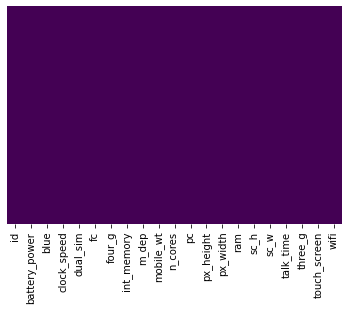

In [7]:
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

### There are No null values in the dataset

In [8]:
data = data.drop(['id'], axis = 1)
data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1043     1          1.8         1  14       0           5    0.1   
1            841     1          0.5         1   4       1          61    0.8   
2           1807     1          2.8         0   1       0          27    0.9   
3           1546     0          0.5         1  18       1          25    0.5   
4           1434     0          1.4         0  11       1          49    0.5   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        193        3  16        226      1412  3476    12     7          2   
1        191        5  12        746       857  3895     6     0          7   
2        186        3   4       1270      1366  2396    17    10         10   
3         96        8  20        295      1752  3893    10     0          7   
4        108        6  18        749       810  1773    15     8          7   

   three_g  touch_screen  wifi  
0        0             1     0  
1        1             0     0  
2        0             1     1  
3        1             1     0  
4        1             0     1

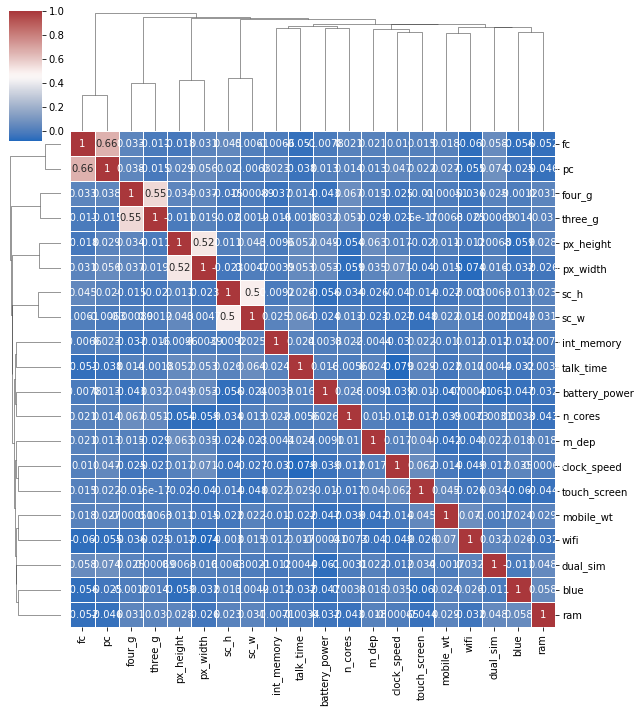

In [9]:
sns.clustermap(data.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

### As per above plot we can see each variable correlated with each other

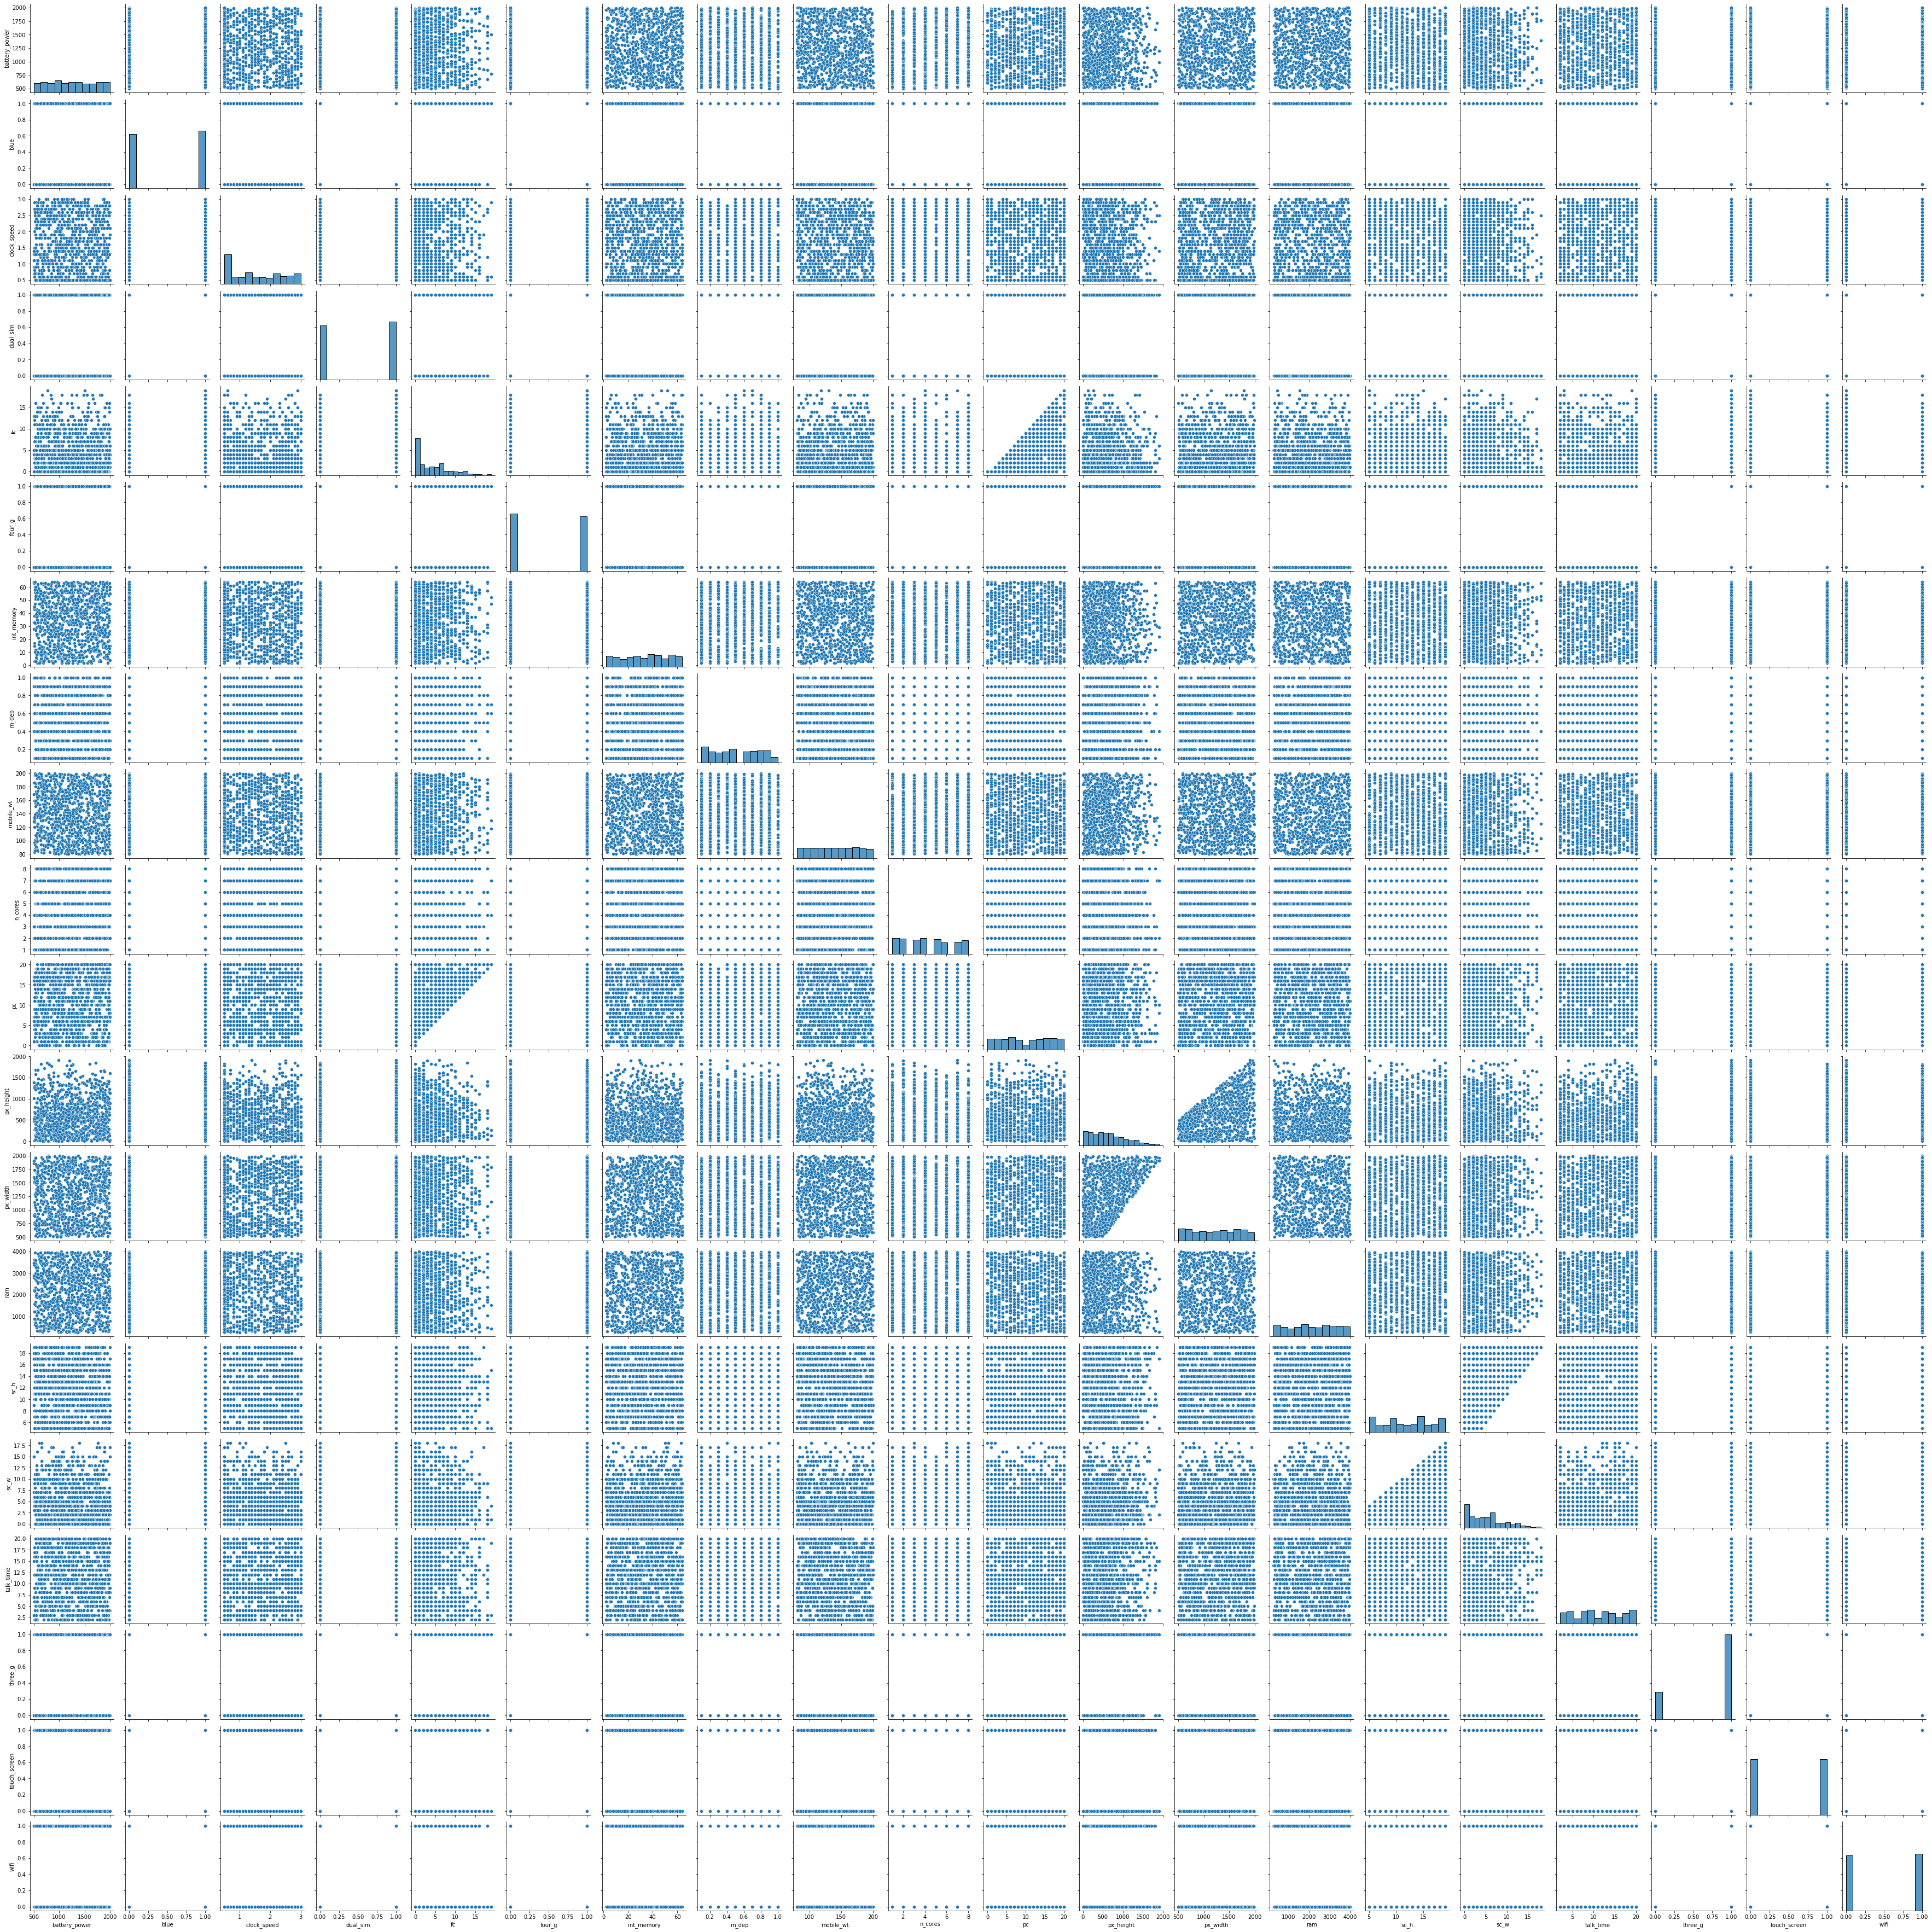

In [10]:
sns.pairplot(data)


<AxesSubplot:xlabel='four_g', ylabel='count'>

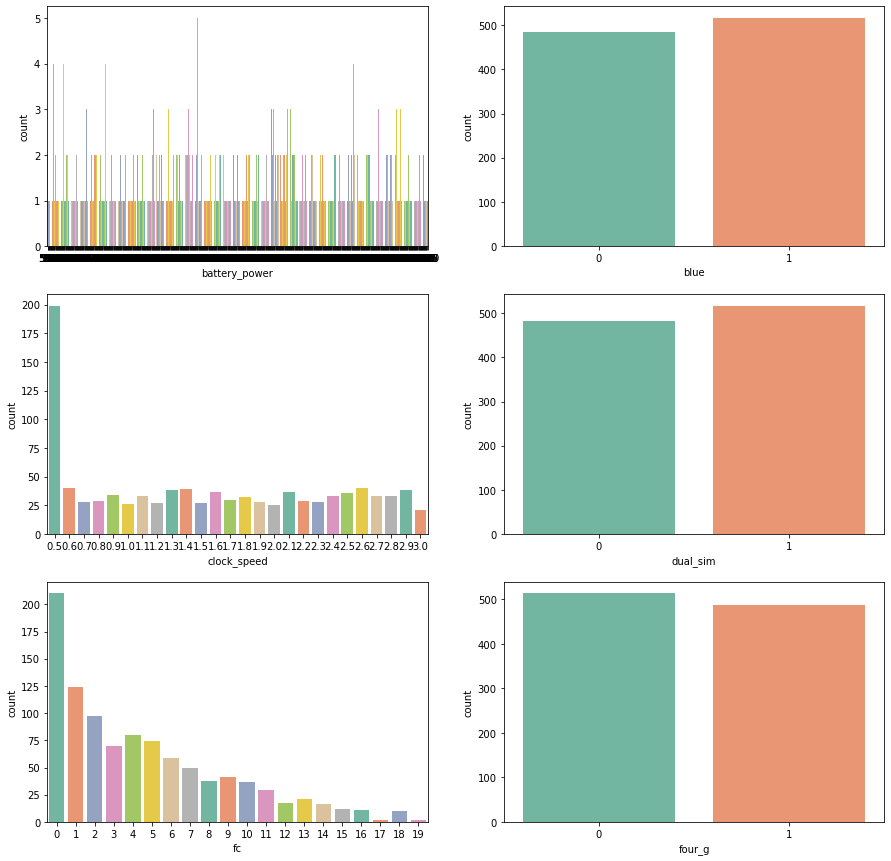

In [11]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'battery_power', palette = 'Set2', data = data)

plt.subplot(3,2,2)
sns.countplot(x = 'blue', palette = 'Set2', data = data)

plt.subplot(3,2,3)
sns.countplot(x = 'clock_speed', palette = 'Set2', data = data)

plt.subplot(3,2,4)
sns.countplot(x = 'dual_sim', palette = 'Set2', data = data)

plt.subplot(3,2,5)
sns.countplot(x = 'fc', palette = 'Set2', data = data)

plt.subplot(3,2,6)
sns.countplot(x = 'four_g', palette = 'Set2', data = data)


<AxesSubplot:xlabel='px_height', ylabel='count'>

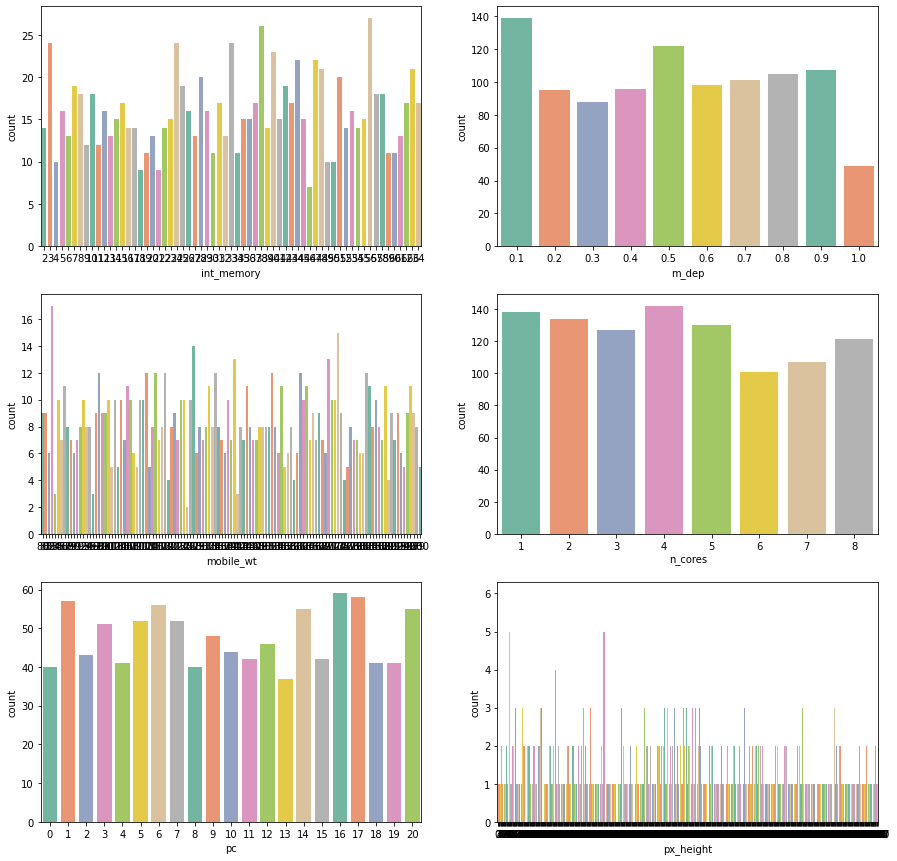

In [12]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'int_memory', palette = 'Set2', data = data)

plt.subplot(3,2,2)
sns.countplot(x = 'm_dep', palette = 'Set2', data = data)

plt.subplot(3,2,3)
sns.countplot(x = 'mobile_wt', palette = 'Set2', data = data)

plt.subplot(3,2,4)
sns.countplot(x = 'n_cores', palette = 'Set2', data = data)

plt.subplot(3,2,5)
sns.countplot(x = 'pc', palette = 'Set2', data = data)

plt.subplot(3,2,6)
sns.countplot(x = 'px_height', palette = 'Set2', data = data)


<AxesSubplot:xlabel='three_g', ylabel='count'>

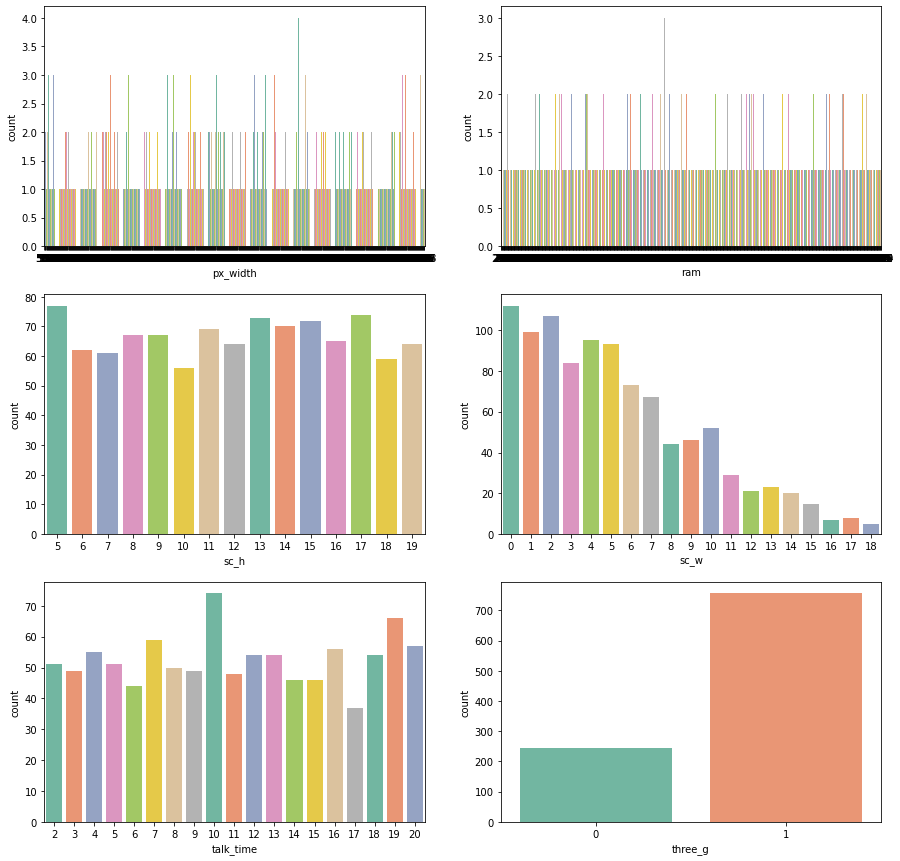

In [13]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.countplot(x = 'px_width', palette = 'Set2', data = data)

plt.subplot(3,2,2)
sns.countplot(x = 'ram', palette = 'Set2', data = data)

plt.subplot(3,2,3)
sns.countplot(x = 'sc_h', palette = 'Set2', data = data)

plt.subplot(3,2,4)
sns.countplot(x = 'sc_w', palette = 'Set2', data = data)

plt.subplot(3,2,5)
sns.countplot(x = 'talk_time', palette = 'Set2', data = data)

plt.subplot(3,2,6)
sns.countplot(x = 'three_g', palette = 'Set2', data = data)


<AxesSubplot:xlabel='battery_power', ylabel='four_g'>

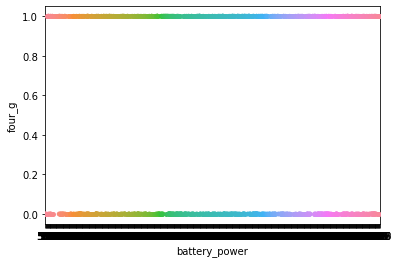

In [14]:
sns.stripplot(data=data, x="battery_power", y="four_g")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='battery_power', ylabel='Density'>

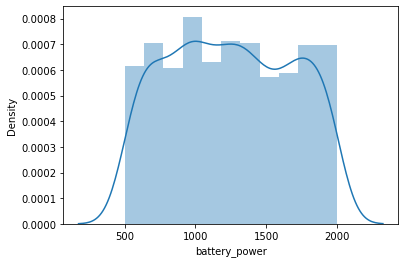

In [15]:
sns.distplot(data['battery_power'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dual_sim', ylabel='Density'>

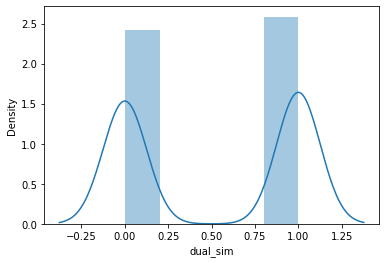

In [16]:
sns.distplot(data['dual_sim'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='int_memory', ylabel='Density'>

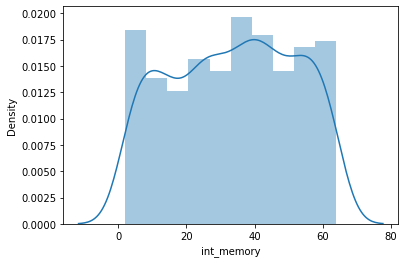

In [17]:
sns.distplot(data['int_memory'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mobile_wt', ylabel='Density'>

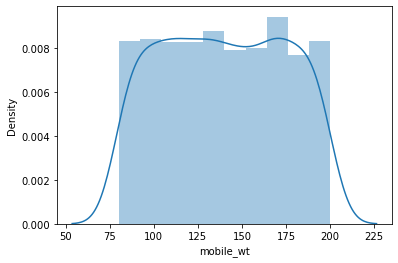

In [18]:
sns.distplot(data['mobile_wt'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ram', ylabel='Density'>

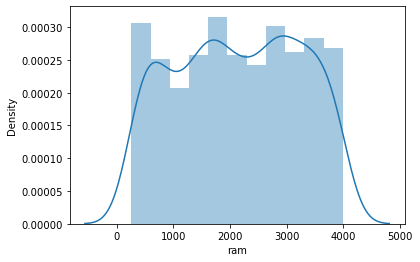

In [19]:
sns.distplot(data['ram'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='talk_time', ylabel='Density'>

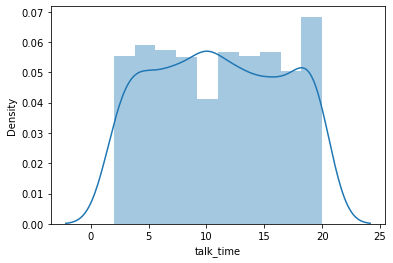

In [20]:
sns.distplot(data['talk_time'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='talk_time'>

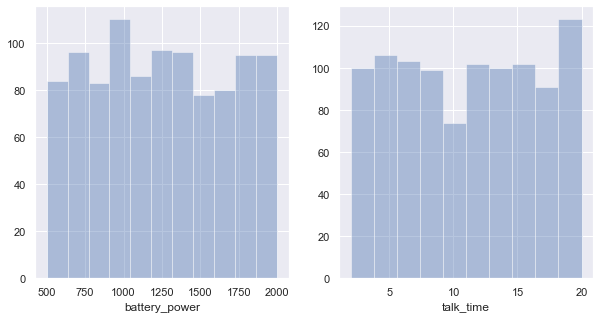

In [22]:
plt.figure(figsize = (10,5))
sns.set(color_codes = True)

plt.subplot(1,2,1)
sns.distplot(data['battery_power'], kde = False)

plt.subplot(1,2,2)
sns.distplot(data['talk_time'], kde = False)